# Multinomial

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from statsmodels.discrete.discrete_model import MNLogit

## 1d

In [71]:
data = pd.read_excel("MultinomialData01.xlsx")
data = data.sort_values("Y")
data

,Y,X1
0,0,10
730,0,17
731,0,9
734,0,12
735,0,10
...,...,...
1022,2,19
144,2,17
1025,2,20
1027,2,17


In [72]:
model = OrderedModel(data["Y"], data["X1"], distr="logit")
res_prob = model.fit(method="bfgs")
res_prob.summary()

Optimization terminated successfully.
         Current function value: 0.773680
         Iterations: 16
         Function evaluations: 19
         Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                      Y   Log-Likelihood:                -1160.5
Model:                   OrderedModel   AIC:                             2327.
Method:            Maximum Likelihood   BIC:                             2343.
Date:                Thu, 17 Mar 2022                                         
Time:                        21:07:53                                         
No. Observations:                1500                                         
Df Residuals:                    1497                                         
Df Model:                           3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.4837      0.019     25.306      0.000       0.446       0.521
0/1            5.5691      0.252     22.062      0.000       5.074       6.064
1/2            0.7319      0.045     16.226      0.000       0.644       0.820
==============================================================================
"""

In [73]:
model.transform_threshold_params(res_prob.params)

array([      -inf, 5.56906153, 7.64816901,        inf])

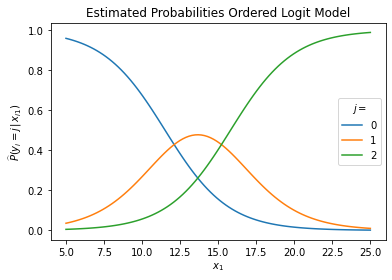

In [74]:
x = np.linspace(5, 25, 100)
y = res_prob.predict(x)

plt.plot(x, y)
plt.legend(["0", "1", "2"], title="$j = $")
plt.title("Estimated Probabilities Ordered Logit Model")
plt.xlabel("$x_{1}$")
plt.ylabel("$\widehat{P}(y_i = j\, |\, x_{i1})$")
plt.show()

In [75]:
res_prob.predict(13.04)

array([[0.32327238, 0.46927246, 0.20745516]])

## 1e

In [78]:
multi_model = MNLogit(data["Y"], sm.add_constant(data["X1"]))
res_multi = multi_model.fit(method="bfgs")
res_multi.summary()

Optimization terminated successfully.
         Current function value: 0.579600
         Iterations: 27
         Function evaluations: 33
         Gradient evaluations: 33


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      Y   No. Observations:                 1500
Model:                        MNLogit   Df Residuals:                     1496
Method:                           MLE   Df Model:                            2
Date:                Thu, 17 Mar 2022   Pseudo R-squ.:                  0.4685
Time:                        21:08:17   Log-Likelihood:                -869.40
converged:                       True   LL-Null:                       -1635.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
       Y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3707      0.324      1.144      0.253      -0.264       1.006
X1            -0.0386      0.026     -1.465      0.143      -0.090       0.013
------------------------------------------------------------------------------
       Y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.0301      1.726    -14.501      0.000     -28.413     -21.647
X1             1.5898      0.107     14.874      0.000       1.380       1.799
==============================================================================
"""

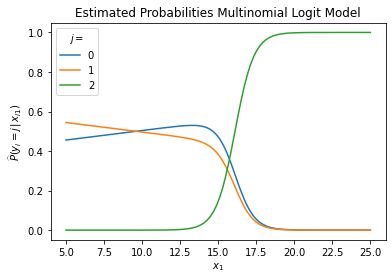

In [77]:
x = np.linspace(5, 25, 100)
y_multi = res_multi.predict(sm.add_constant(x)) # ikk weet niet zeker of je hier een constant moet toevoegen

plt.plot(x, y_multi)
plt.legend(["0", "1", "2"], title="$j = $")
plt.title("Estimated Probabilities Multinomial Logit Model")
plt.xlabel("$x_{1}$")
plt.ylabel("$\widehat{P}(y_i = j\, |\, x_{i1})$")
plt.show()

In [81]:
res_multi.aic

1746.798883731893

## 1f

In [31]:
data_tilde = data.replace({2: 1, 1:2})
data_accent = data.replace({1: 0, 0:1})

display(data_tilde, data_accent)

,Y,X1
0,0,10
1,1,18
2,1,16
3,1,19
4,0,13
...,...,...
1495,1,21
1496,0,10
1497,0,17
1498,1,17


,Y,X1
0,1,10
1,2,18
2,2,16
3,2,19
4,1,13
...,...,...
1495,2,21
1496,1,10
1497,1,17
1498,2,17


In [80]:
model_tilde = OrderedModel(data_tilde["Y"], data_tilde["X1"])
res_tilde = model_tilde.fit(method="bfgs")
res_tilde.aic

Optimization terminated successfully.
         Current function value: 1.090558
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10


3277.674842601285

In [79]:
model_accent = OrderedModel(data_accent["Y"], data_accent["X1"])
res_accent = model_accent.fit(method="bfgs")
res_accent.aic

Optimization terminated successfully.
         Current function value: 0.741445
         Iterations: 14
         Function evaluations: 16
         Gradient evaluations: 16


2230.336010932344